### About Dataset

#### FinTech (Digital Wallet) Customer Lifetime Value (LTV) Dataset for Analysis

##### Description:

###### This dataset helps to predict the Customer Lifetime Value (LTV) for users of digital wallets, specifically targeting platforms like PayTM and Khalti. The dataset contains about 7,000 samples with 20 rich features capturing customer demographics, transaction history, engagement metrics, app usage patterns, support interactions, etc.

### Project Goal

#### Phase 1: Data Analysis. We will check the available data to profile the customer database, group users and take a first look to LVT. In order to understand what are the mosth valuable customers and where the potential opportunities are. 

#### Phase 2: Data Science:  Apply classification and regression models to the avaialable data, in order to predict the behavior for both the LVT and the mosth valuable customers segmentation.


#### Project Blue print

### 1: Data Analysis:

#### A: Demographical distribution. Solves business questions: Who is my usual customer? Do I have younger or older customers? Are my customer high or low earners?
#### - Avergae Age, Age histogram.
#### - Income distribution by location. 
#### B: Transactional Analisis. Solves business questions: How do my customers spend? Is spend distributed evenly or focused on high value customers.
#### - Total transactions by customer by month
#### - Average transaction compared to max transactions total.
#### C: Satisfaction and support. Solves the question Does a bad support impact my customers?
#### - Open tickets vs satisfaction.
#### - Time to resolution.
#### D: LTV first look. To solve the question. Where are my Most valuable customers? 
#### - LTV distribution
#### - Average LVT by segment(INcome level, Location and Age)

### 2: Data Science:
#### A: Prediction (Regression)
#### Target: LVT
##### - Forecast the LVT for a customer based on predictive model (Regression). So that and LVT can be estimated based on the customers trends. Answering question like " This customer will represent an estimate revenue of 150 USD over the next 6 months

#### B: Customer Profiling (Segmetation)
##### - Create a customer profile based on the available data.

###### * Data utilization insn't originally in the best shape, so normalization and data wrangling will be required.

In [566]:
# We must start by importing the libraries and tools to be used

import pandas as pd # To Analyse the data frame
import numpy as np

# Picked the sklearn submodules as I used them
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score, f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

#Graphs
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

### Phase 2 : Data Science. and applied ML
#### Now we will use as much features (columns) in teh ata set as possible to predict the LVT, an important metric for the business.
#### It is important to remember that this information woul be considered for finance, to determine forecasting of income and customers behavior. 
#### We must consider both regression an classification models, as we do not only want to know the LVT but also the risk a customer has to become a low mid or high income customer. 

In [489]:
df = pd.read_csv("digital_wallet_ltv_dataset.csv")
df.head()


,Customer_ID,Age,Location,Income_Level,Total_Transactions,Avg_Transaction_Value,Max_Transaction_Value,Min_Transaction_Value,Total_Spent,Active_Days,Last_Transaction_Days_Ago,Loyalty_Points_Earned,Referral_Count,Cashback_Received,App_Usage_Frequency,Preferred_Payment_Method,Support_Tickets_Raised,Issue_Resolution_Time,Customer_Satisfaction_Score,LTV
0,cust_0000,54,Urban,Low,192,16736.384023,60216.834510,6525.814861,3.213386e+06,140,209,2114,25,2224.012140,Monthly,Debit Card,3,61.568590,1,3.279546e+05
1,cust_0001,67,Suburban,High,979,14536.734683,48350.100272,2186.742245,1.423146e+07,229,240,2960,20,4026.823518,Monthly,UPI,17,60.392889,8,1.437053e+06
2,cust_0002,44,Urban,High,329,7061.372800,32521.157187,2743.406808,2.323192e+06,73,21,3170,0,1441.011395,Monthly,Debit Card,11,45.305579,4,2.419387e+05
3,cust_0003,30,Rural,High,71,16426.876453,17827.896720,4360.784994,1.166308e+06,299,285,4756,35,4365.855580,Weekly,Wallet Balance,6,22.030191,1,1.284599e+05
4,cust_0004,58,Urban,Middle,878,10800.092660,17497.634534,4532.872520,9.482481e+06,236,329,1992,18,4161.523827,Daily,UPI,18,20.634723,5,9.569514e+05


### Data Normalization
##### As ML model perform with numeric values, we must transform the categorized columns into numerics groups. so we will take the colums " Location, Income level, App usage frequency and preffered payment method" to create numeric values from 1 to 4 ( Dependeing on teh categories count)

In [490]:
# This code snip will take the before mentioned columns, look for its values and the replace teh categorized groups.
df["Location"] = df["Location"].apply(
    lambda x: 1 if x == "Urban" else (2 if x == "Suburban" else 3),
)
df["Income_Level"] = df["Income_Level"].apply(
    lambda x: 1 if x == "Low" else (2 if x == "Middle" else 3),
)
df["App_Usage_Frequency"] = df["App_Usage_Frequency"].apply(
    lambda x: 1 if x == "Monthly" else (2 if x == "Weekly" else 3),
)
df["Preferred_Payment_Method"] = df["Preferred_Payment_Method"].apply(
    lambda x: 1 if x == "Debit Card" else (2 if x == "UPI" else(3 if x == "Wallet Balance" else 4)),
)

In [491]:
#We can print a quick unique for each colum to check individually. and maek sure the ranges are correct.
print(
f' Location {df["Location"].unique()}',
f' Preferred Payment method {df["Preferred_Payment_Method"].unique()}',
f' App Usage Frequency {df["App_Usage_Frequency"].unique()}',
f' Income level {df["Income_Level"].unique()}'
)

 Location [1 2 3]  Preferred Payment method [1 2 3 4]  App Usage Frequency [1 2 3]  Income level [1 3 2]


##### Now, the model performance relies aswell on the escalar numeric values, remember that we want to predic based on statistics, wo wide ranges might interfere with our hipotesi. Therefore we will want to escale number in ranges from 0 to 1. (% like values).

##### We must do this for all numeric columns like : Age	Total_Transactions	Avg_Transaction_Value	Max_Transaction_Value	Min_Transaction_Value	Total_Spent	Active_Days	Last_Transaction_Days_Ago	Loyalty_Points_Earned	Referral_Count	Cashback_Received	Support_Tickets_Raised	Issue_Resolution_Time	Customer_Satisfaction_Score	and LVT. 

#### However, as LVT is our target, we might need extra processing before transforming it. I'll explain that latter, first lets escale the other columns. 

In [492]:
#We will use the satndar scaler from sklearn to escale the numeric values first. We are not sure yet if this is better as 
# the model is a regression. Maybe we could consider KNN latter.
Scaler = StandardScaler()
scaled = Scaler.fit_transform(df[["Age", "Total_Transactions", "Avg_Transaction_Value" , "Max_Transaction_Value", "Min_Transaction_Value" , "Total_Spent", "Active_Days" , "Last_Transaction_Days_Ago" , "Loyalty_Points_Earned" , "Referral_Count" , "Cashback_Received","Support_Tickets_Raised" , "Issue_Resolution_Time" , "Customer_Satisfaction_Score"]])
scaled

array([[ 0.73260321, -1.08022364,  1.17456799, ..., -1.16249699,
         1.22820552, -1.56608784],
       [ 1.57050593,  1.66905544,  0.79403662, ...,  1.15667539,
         1.17053903,  0.88147074],
       [ 0.08806265, -0.60163249, -0.4991739 , ...,  0.16274437,
         0.4305276 , -0.51713416],
       ...,
       [-1.71665089, -0.07064085,  0.77546036, ...,  0.32839954,
         0.41735088, -1.21643662],
       [-0.68538601,  0.25424219, -0.33592511, ...,  0.16274437,
         0.37363959, -1.56608784],
       [-1.65219684,  1.13107707,  0.99487403, ...,  1.15667539,
        -0.06937167, -1.56608784]], shape=(7000, 14))

In [493]:
df_Model_Ready = pd.DataFrame(
    scaled,
    columns=["Age_scaled", "Total_Transactions_scaled", "Avg_Transaction_Value_scaled" , "Max_Transaction_Value_scaled", "Min_Transaction_Value_scaled" , "Total_Spent_scaled", "Active_Days_scaled" , "Last_Transaction_Days_Ago_scaled" , "Loyalty_Points_Earned_scaled" , "Referral_Count_scaled" , "Cashback_Received_scaled","Support_Tickets_Raised_scaled" , "Issue_Resolution_Time_scaled" , "Customer_Satisfaction_Score_scaled"],
    index=df.index
)
df_Model_Ready.head()

,Age_scaled,Total_Transactions_scaled,Avg_Transaction_Value_scaled,Max_Transaction_Value_scaled,Min_Transaction_Value_scaled,Total_Spent_scaled,Active_Days_scaled,Last_Transaction_Days_Ago_scaled,Loyalty_Points_Earned_scaled,Referral_Count_scaled,Cashback_Received_scaled,Support_Tickets_Raised_scaled,Issue_Resolution_Time_scaled,Customer_Satisfaction_Score_scaled
0,0.732603,-1.080224,1.174568,1.366577,1.613093,-0.407417,-0.399018,0.239417,-0.267905,0.011196,-0.189173,-1.162497,1.228206,-1.566088
1,1.570506,1.669055,0.794037,0.827046,-0.361739,2.102291,0.447834,0.534498,0.316924,-0.332227,1.062303,1.156675,1.170539,0.881471
2,0.088063,-0.601632,-0.499174,0.107370,-0.108386,-0.610187,-1.036536,-1.550101,0.462094,-1.705918,-0.732716,0.162744,0.430528,-0.517134
3,-0.814294,-1.502921,1.121024,-0.560671,0.627728,-0.873703,1.113897,0.962840,1.558476,0.698041,1.297652,-0.665531,-0.711098,-1.566088
4,0.990419,1.316225,0.147611,-0.575687,0.706050,1.020564,0.514440,1.381663,-0.352242,-0.469596,1.155809,1.322331,-0.779543,-0.167483


In [494]:
df_Model_Ready[["Location", "Income_Level", "App_Usage_Frequency","Preffered_Payment_Mthod"]] = df[["Location", "Income_Level", "App_Usage_Frequency","Preferred_Payment_Method"]]
df_Model_Ready.head()

,Age_scaled,Total_Transactions_scaled,Avg_Transaction_Value_scaled,Max_Transaction_Value_scaled,Min_Transaction_Value_scaled,Total_Spent_scaled,Active_Days_scaled,Last_Transaction_Days_Ago_scaled,Loyalty_Points_Earned_scaled,Referral_Count_scaled,Cashback_Received_scaled,Support_Tickets_Raised_scaled,Issue_Resolution_Time_scaled,Customer_Satisfaction_Score_scaled,Location,Income_Level,App_Usage_Frequency,Preffered_Payment_Mthod
0,0.732603,-1.080224,1.174568,1.366577,1.613093,-0.407417,-0.399018,0.239417,-0.267905,0.011196,-0.189173,-1.162497,1.228206,-1.566088,1,1,1,1
1,1.570506,1.669055,0.794037,0.827046,-0.361739,2.102291,0.447834,0.534498,0.316924,-0.332227,1.062303,1.156675,1.170539,0.881471,2,3,1,2
2,0.088063,-0.601632,-0.499174,0.107370,-0.108386,-0.610187,-1.036536,-1.550101,0.462094,-1.705918,-0.732716,0.162744,0.430528,-0.517134,1,3,1,1
3,-0.814294,-1.502921,1.121024,-0.560671,0.627728,-0.873703,1.113897,0.962840,1.558476,0.698041,1.297652,-0.665531,-0.711098,-1.566088,3,3,2,3
4,0.990419,1.316225,0.147611,-0.575687,0.706050,1.020564,0.514440,1.381663,-0.352242,-0.469596,1.155809,1.322331,-0.779543,-0.167483,1,2,3,2


#### So far, we have normalized all our features, but our target is still pending.

#### AS the target (LTV) is our key colum, we want to make sure it is clean and within ranges that facilitate the model a prediciton. This means that abnormal or ocassiobnal values should be closer to other values, otherwise it will drag our predictions lower or higher than expected.

#### This next portion is dedicated to LTV understanding

In [495]:
#An initial description will tell us right away if the data is skewed to one side. 
df["LTV"].describe()

count    7.000000e+03
mean     5.119197e+05
std      4.390551e+05
min      3.770495e+03
25%      1.482058e+05
50%      3.878180e+05
75%      7.748578e+05
max      1.956988e+06
Name: LTV, dtype: float64

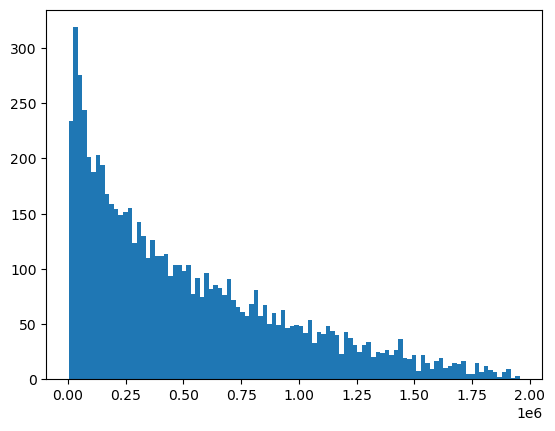

In [496]:
#This can be confirmed with a qick hisstogram
ltv = df["LTV"]
fig = plt.hist(
    ltv,
    bins= 100
)

#### As suspected, there is a clear segmentation around the median. For this case we will perform a Log estandarization This keeps values differences but help to have "even" data

In [497]:
#In order to normalize this data, we can apply a logaritmical transformaiton. so we are not thinking about values but magnitudes. 
df_Model_Ready["LTV"] = np.log1p(df["LTV"])

In [498]:
# Now we can confirm with both the deccribe and the hist.
df_Model_Ready["LTV"].describe()

count    7000.000000
mean       12.634292
std         1.181935
min         8.235227
25%        11.906364
50%        12.868294
75%        13.560436
max        14.486917
Name: LTV, dtype: float64

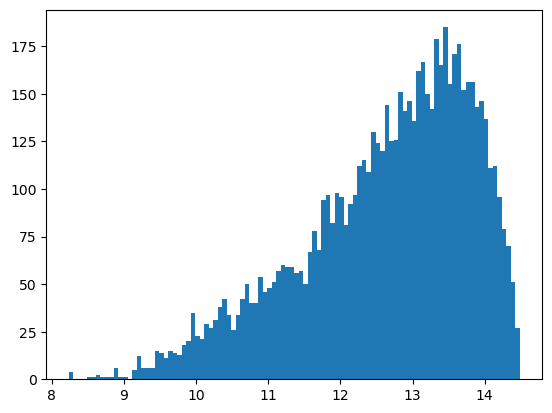

In [499]:
fig2 = plt.hist(
    df_Model_Ready["LTV"],
    bins = 100
)
#As data is already usable, we can use the column to our model ready data frame  (Already added when transforming)

### Model training
##### With a model ready data frame, we can start training our two picks (Regression and clasissifcation).
##### Lets go with regression first.
###### Ridge

In [500]:
# We define our features as X and our target as Y
X = df_Model_Ready.drop(columns=["LTV"])
y = df_Model_Ready["LTV"]

# Now we do the split between training data and testing data.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [501]:
ridge = Ridge (alpha= 1.0)
ridge.fit(X_train, y_train)

,alpha,1.0
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


#### Now we have to evaluate how the model is performing, otherwise is just data providing data.
##### the selected metrics are Mean Absolute Error, Root mean squared error and coefficient of determination. 
##### MAE corresponds to " How far are we from real values? ". the closer to 0 the better.
##### RMSE is similar but focused on bigger errors, the outliers. the closer to 0 the better.
##### r2 will focused on how effectie it is for the problem. the closer to 1 the better.

In [502]:
y_pred_train = ridge.predict(X_train)
y_pred_test =  ridge.predict(X_test)
MAE = mean_absolute_error(y_test,y_pred_test)
R2 = r2_score(y_test,y_pred_test)
sqrt = np.sqrt(mean_squared_error(y_test,y_pred_test))

print(f' as KPI we can see that MAE is {MAE},R2 {R2} and RMSE {sqrt}')

 as KPI we can see that MAE is 0.3757714418146892,R2 0.8200499184764853 and RMSE 0.5072904145097988


#### so we can see that, for a first iteration, this model isn't that far. it is already good enough to predict about 60% of cases based on MAE and RMSE. and the coefficeint tells us that it is predicting good in 82% of scenarios. I am pretty sure that oicking other models will increase this, but we could also focus on the features that are meaningfull.

#### That being said, we will try to find out what are our best features to predict the LTV

In [503]:

# We will use the coefficient tool from the ridge model to see what are the most important features.
coef_df = pd.DataFrame({
"feature":X_train.columns,
"Coeficient": ridge.coef_
}
).sort_values(by="Coeficient", ascending = False)

# as we don't have that many, we will see our top 3 great and worst 3.
print(coef_df.head(3))
print(coef_df.tail(3))

                        feature  Coeficient
2  Avg_Transaction_Value_scaled    0.654056
1     Total_Transactions_scaled    0.647712
5            Total_Spent_scaled    0.152691
                             feature  Coeficient
10          Cashback_Received_scaled   -0.002868
7   Last_Transaction_Days_Ago_scaled   -0.005066
17           Preffered_Payment_Mthod   -0.009270


<BarContainer object of 18 artists>

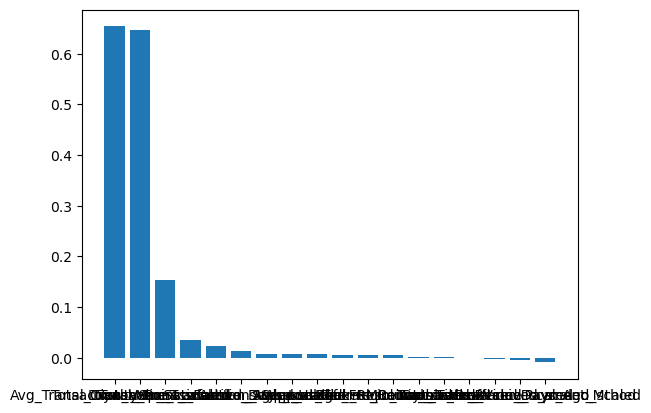

In [504]:
#lets check them in a graph
coef_fig = plt.bar(
    coef_df["feature"], coef_df["Coeficient"]
)
coef_fig

##### Now we can see how the first 4 features are good enough to predict the LTV. So, if we were pretending to have a larger data set, we could train only based on those features, reducing computing cost and development time.

#### We could also continue the research and keep interaring using other models like lasso. But I won't do it this time to prevent this file from being too extended.

### Classification
#### As we have estimated the features that would help us predict how long a customer will stay with us, we would also like to know what kind of customer will it become, so we want to "group" our estimations. This will be acompplished with a classification Model.

#### We will do random forest classification as it is both robust and strong, and we already spend time normalizing data so it performs properly.
#### AS KPIs we will use f1_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score to have a extended view of its performance. 

### Classification data prep.
##### AS we know that the LTV is a continues variable, ( becasue we have trasnformed that previously), we ned to create categories, like grouping our LTV values in 3. like low middle and high. To understand the conditions that coudl drive our customers to stay longer in the app. 
#### To so so, we will transform the column before using it in the model.

In [ ]:
# Frist we make a copy to use it only for Random
df_Model_Ready_rf = df_Model_Ready

In [ ]:
# Here, we want to create categoreis ( groups 1 2 and 3), so we will call our continues variables into the new data frame
df_Model_Ready_rf["LTV"] = df_Model_Ready["LTV"]

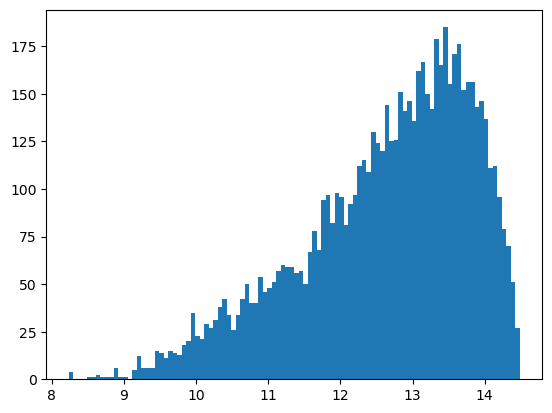

In [ ]:
# We will wickly check the distribution to have an idea of our groups boundaries
figtest = plt.hist(
    df_Model_Ready["LTV"],
    bins=100
)

In [ ]:
# AS we previously confirmed, we have clear grouping aroun 11.5 and 13 values. so we will split data into that. 

df_Model_Ready_rf["LTV"] = df_Model_Ready_rf["LTV"].apply( 
    lambda x: "1" if x < 11.5 else( "2" if 11.5 <= x <= 13 else "3")
)

In [ ]:
#Just checkign that the transformaiton took place prrperly.
df_Model_Ready_rf["LTV"].value_counts()

LTV
3    3198
2    2560
1    1242
Name: count, dtype: int64

In [ ]:
#Now we can create our x and y for random forest. so here we will call the columns and then split our data frame. 

Xrf = df_Model_Ready_rf.drop(columns=["LTV"])
yrf = df_Model_Ready_rf["LTV"]
Xrf_train, Xrf_test, yrf_train, yrf_test = train_test_split(Xrf, yrf, test_size=0.2,random_state=42)

In [ ]:
# Now we can create the model's code

rf = RandomForestClassifier(
    n_estimators=100,
    max_depth=None,
    random_state=42,
    n_jobs=1
)

#lets train our data
rf.fit(Xrf_train,yrf_train)


,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [ ]:
# Now we can trai our rain forest

yrf_pred_train = rf.predict(Xrf_train)
yrf_pred_test =  rf.predict(Xrf_test)

# We must check the KPIs to see how does it perform

f1 = f1_score(yrf_test,yrf_pred_test, average= "weighted")
acc = accuracy_score(yrf_test,yrf_pred_test)
classRep = classification_report(yrf_test,yrf_pred_test,output_dict=True) # We want a disctionary so we can create a data frame latter. 
ConMat = confusion_matrix(yrf_test,yrf_pred_test)


print(f' as KPI we can see that f1 is {f1}, accuracy score is {acc}')

 as KPI we can see that f1 is 0.9914319727098502, accuracy score is 0.9914285714285714


In [ ]:
# the classification report could be dispalyed on a quick plot, so we will create a data frame out of it. 
classRepdf = pd.DataFrame(classRep).transpose()
classRepdf

,precision,recall,f1-score,support
1,0.984556,0.988372,0.986460,258.000000
2,0.988439,0.988439,0.988439,519.000000
3,0.996785,0.995185,0.995984,623.000000
accuracy,0.991429,0.991429,0.991429,0.991429
macro avg,0.989927,0.990665,0.990295,1400.000000
weighted avg,0.991437,0.991429,0.991432,1400.000000


In [ ]:
# Now lest extract what we want to see
classRepdf_PLt = classRepdf.head(3)
classRepdf_PLt = classRepdf_PLt[["precision","recall","f1-score"]] * 100 # as those are percent values, we can multiply by 100 to show them
classRepdf_PLt

,precision,recall,f1-score
1,98.455598,98.837209,98.646035
2,98.843931,98.843931,98.843931
3,99.678457,99.518459,99.598394


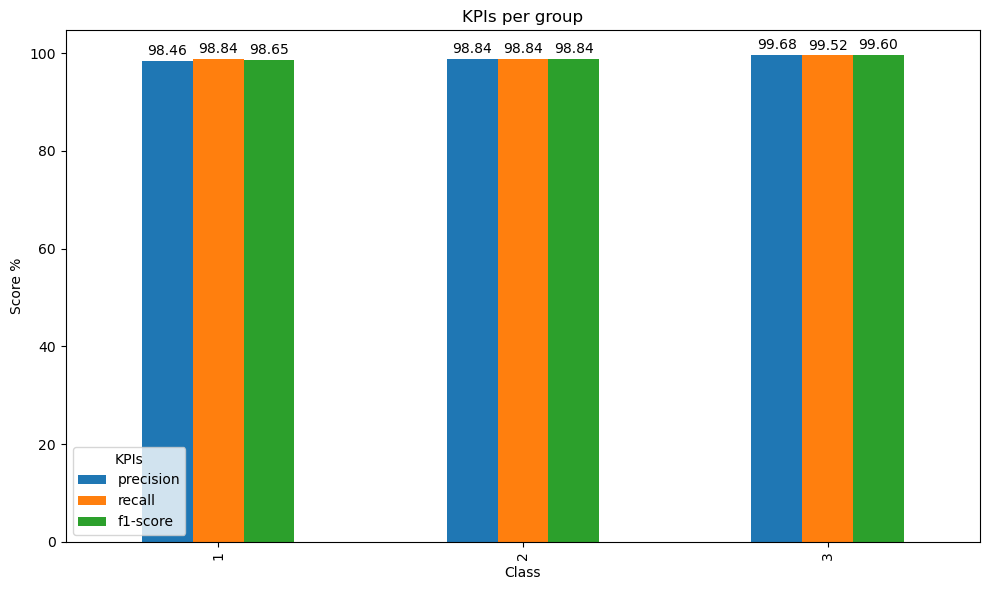

In [ ]:
# Now lest create our figure.
ax = classRepdf_PLt.plot(
    kind="bar", figsize=(10,6),
    title="KPIs per group"
)
ax.set_xlabel("Class")
ax.set_ylabel("Score %")

for container in ax.containers:
    ax.bar_label(container, fmt="%.2f", padding=2)
    
plt.legend(title="KPIs")
plt.tight_layout()

#### As we can see, the model is performing better than expected withou beigh a 100% result. This means that overfitting is likely not teh case, but we must run other checks to verify this. however, this result can be more related to the time que spend before preparing the data and the model selection. 

#### We have choosen the right model for the data available. 

In [ ]:
# WE cna also see the confussion matrix

cm = ConMat
cm_df = pd.DataFrame(
    cm,
    index=[f'True {c}' for c in rf.classes_],
    columns=["Predicted 1", "Predicted 2", "Predicted 3"]
)
cm_df

,Predicted 1,Predicted 2,Predicted 3
True 1,255,3,0
True 2,4,513,2
True 3,0,3,620


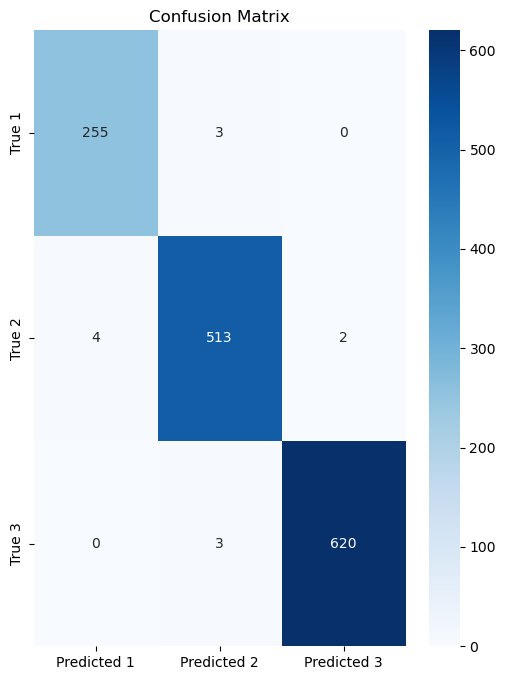

In [542]:
plt.figure(figsize=(6,8))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

##### The wrongly predicted values are likely due to the frontiers between groups, but the perfromance is great for the informaiton available. 